***
This is DSSS Final Assignment
dataset are avaliable [here](https://github.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/tree/main/data)
***

# Spatial Pattern of Fiscal Decentralisation: Clustering Analysis on Regional-Level
<p style="color:DimGray; text-align:left; font-size:20px"><i> with case study of East Java, Indonesia </i></p>

## 1.0 Introduction and Literature Review

Fiscal decentralisation policies have been broadly suggested by the world bank to improve regional economic development (World Bank, 2008). The fiscal decentralisation policies intend to empower regional governments by giving them authority in customizing their own revenue and expenditure (Booth, 2003). It does not only encourage local governments to explore and exploit their potential (Firman, 2009) but also increase their responsiveness and awareness of public need (Faguet, 2004). 

Regional economic development leads to two possible consequences: spatial equilibrium (regional convergence) and spatial disequilibrium (regional divergence or disparities) (Aritenang and Chandramidi, 2022). Local development can make regions grow apart which results in a huge economic gap that could lead to spatial agglomeration. On the contrary, it gives chance for regions to utilise their potential and increase the free movement of production factors—labour and capital—which results in equal conditions with its surrounding (Lipshitz, 1992). Thus, spatial factors play an important role in regional economic development. Day and Lewis (2013) stated that geographic spill-over affects regional development because their findings showed there is influence from local neighbours. Arbia (2006) as cited by Aritenang and Chandramidi (2022) stated that regional spill-over affects how fast regions develop and confirms that regional convergence is more likely to cluster within the same country. 

Indonesia has been aiming to reduce socioeconomic disparities and achieve regional convergence by implementing fiscal decentralisation since 2001 (Day and Lewis, 2013; Aritenang and Chandramidi, 2022). In their study on the impact of fiscal decentralisation in Indonesia, Setiawan and Aritenang (2019), found that it has some impact on the economic performance of districts or cities. This study also found the presence of fiscal decentralisation effect on regional clustering. It means that fiscal decentralisation helps reduce regional disparities. It also confirms the previous study by Day and Lewis (2013) that stated spill-over positively affects neighbouring economic growth in Indonesia. On the other hand, using the spatial lag model, Vidyattama (2013) using spatial lag model,  found a very weak regional convergence trend in Indonesia. It is also confirmed by Aritenang and Chandramidi (2022) who found that Indonesia is still suffer from economic disparities in province level. The study showed there are 4 provinces that has high gini coefficient, East Java, North Sumatra, Riau Island, and Papua. Higher gini coefficient indicates high inequality.


## 2.0 Research Question

Although fiscal decentralisation has been implemented for over 20 years in Indonesia, it is remain unclear whether regional autonomy bring successfully bring Indonesia to regional equality or disparities. Thus, this research aims to assess spatial pattern of fiscal decentralisation on regional level in East Java which have high gini coefficient. To achieve the objectives, this paper breakdown into these following question to achieve the objectives:

> **Q1** How is the distribution of local government fiscal decentralisation in East Java?
>
> **Q2** How does spatial pattern of fiscal decentralisation in East Java?
>
> **Q3** Does spillover affect the distribution of fiscal decentralisation in East Java?

Before run the analysis, pyhton packages has to be installed before hand

In [327]:
# import library

import math
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

from shapely.geometry import Point, Polygon

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN
from sklearn import metrics
from sklearn.preprocessing import RobustScaler, MinMaxScaler

import libpysal
import warnings

## 3.0 Mothods

Previous studies have been using clustering to analyse the distribution of fiscal decentralisation with multiple dimensions. Clustering analysis was done to group numbers of entities into smaller group with similar characteristic based on multiple dimensions. Considering multi-variable of fiscal decentralisation, this techniques has abilities to reduce complexity of the dataset and accurately predict main attribute of the dataset(Liu, 2011). Thus, for this paper we will use clustering methods to analyse fiscal decentralisation in East Java.

Moreover, understanding spatial patterns and spill-over effects of fiscal decentralisation can be done by exploring geographic distribution of non-spatial cluster. For this methods, clustering of non-spatial variables will be done first, then the assigned cluster will be plotted into the maps. This method is selected to help observing spill-over effect which cannot be seen using spatial clustering as it considers geographical adjacency in the calculation. Indication of spill-over effect will be shown by agglomeration of regions with same cluster. 

K-means and DBSCAN are two non-hierarchical clustering that will be used in this research. Each of these methods has its own pros and cons. K-means is more popular due to its fast processing and ability to handle large dataset. While, DBSCAN is more sensitive to outliers (Mohammed, Jacksi and Zeebaree, 2020). 


## 4.0 Data Presentation and Pre-processing

### 4.1 Government Revenue Expenditure Data

In fiscal decentralisation, local governments are given the authority to manage their revenue and spending budget. Thus, assessing fiscal decentralisation impact can be done by examining city governments' revenue stream which are from own source of revenue (OSR)—tax revenue, retribution, and owned-enterprise revenue—and intergovernmental transfer (IGT) (Booth, 2003). OSR comes from tax revenue, retribution, and owned-enterprise revenue. Meanwhile, IGT is received from general or special allocation fund from higher level government—national and province government (Direktorat Jenderal Perimbangan Keuangan, 2017; Aritenang and Chandramidi, 2022). Previous study also indicates that government capital expenditure also the significant variables of fiscal decentralisation (Liu, 2011; Aritenang and Chandramidi, 2022)

|Account|Variables|
|----|----|
|Revenue| Tax revenue|
||Retribution |
||Owned-enterprise Revenue
||Intergovernmental Transfer|
|Spending|Capital Expenditure|


The fiscal decentralisation data are freely obtained from the Indonesian Ministry of Finance who collects collected revenue and expenditure data of every government from national to regional level. The dataset of revenue expenditure are openly published in csv format on their [website](https://djpk.kemenkeu.go.id/portal/data/apbd). For this research we are going to examine revenue expenditure in 2021. All the data are assign with the same unit—**billion Rupiah (IDR)**. 

Each city government dataset are stored in different csv file with similar column format. However, to run analysis it is required to have one single dataset for all the city. Thus beforehand, to read the raw file we need to make a list of 38 regions in East Java.

**Notes:** The raw dataset has been downloaded from Ministry of Finance's website and stored in a github repository with file naming format `City.csv`. Thus, the list of city name has to follow the filenaming.


In [328]:
# Make an array of all the city name
city_name = [
    "Bangkalan",
    "Banyuwangi",
    "Batu",
    "Blitar",
    "Bojonegoro",
    "Bondowoso",
    "Gresik",
    "Jember",
    "Jombang",
    "Kediri",
    "Kota_Blitar",
    "Kota_Kediri",
    "Kota_Madiun",
    "Kota_Malang",
    "Kota_Mojokerto",
    "Kota_Pasuruan",
    "Kota_Probolinggo",
    "Lamongan",
    "Lumajang",
    "Madiun",
    "Magetan",
    "Malang",
    "Mojokerto",
    "Nganjuk",
    "Ngawi",
    "Pacitan",
    "Pamekasan",
    "Pasuruan",
    "Ponorogo",
    "Probolinggo",
    "Sampang",
    "Sidoarjo",
    "Situbondo",
    "Sumenep",
    "Surabaya",
    "Trenggalek",
    "Tuban",
    "Tulungagung",
]
city_name

['Bangkalan',
 'Banyuwangi',
 'Batu',
 'Blitar',
 'Bojonegoro',
 'Bondowoso',
 'Gresik',
 'Jember',
 'Jombang',
 'Kediri',
 'Kota_Blitar',
 'Kota_Kediri',
 'Kota_Madiun',
 'Kota_Malang',
 'Kota_Mojokerto',
 'Kota_Pasuruan',
 'Kota_Probolinggo',
 'Lamongan',
 'Lumajang',
 'Madiun',
 'Magetan',
 'Malang',
 'Mojokerto',
 'Nganjuk',
 'Ngawi',
 'Pacitan',
 'Pamekasan',
 'Pasuruan',
 'Ponorogo',
 'Probolinggo',
 'Sampang',
 'Sidoarjo',
 'Situbondo',
 'Sumenep',
 'Surabaya',
 'Trenggalek',
 'Tuban',
 'Tulungagung']

Since multiple file has to be stacked into single dataset, we will use looping `for` to read all files. The original format of the raw data is in long dataset so it has to be transpose into wide dataset.

In [329]:
data = pd.DataFrame()

for i in city_name:
    df = pd.read_csv(
        "https://raw.githubusercontent.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/main/data/apbd_2021/"
        + i
        + ".csv"
    )
    df = df.drop(columns=["realisasi", "persentase"])
    df.rename(columns={"akun": "index"}, inplace=True)
    df.rename(columns={"anggaran": i}, inplace=True)
    df = df.T
    if len(data) != 0:
        df = df.drop(["index"])
    data = pd.concat([data, df])

data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
index,Pendapatan Daerah,PAD,Pajak Daerah,Retribusi Daerah,Hasil Pengelolaan Kekayaan Daerah yang Dipisahkan,Lain-Lain PAD yang Sah,TKDD,Pendapatan Transfer Pemerintah Pusat,Pendapatan Lainnya,Pendapatan Transfer Antar Daerah,...,Penjualan Kekayaan Daerah yang Dipisahkan,Penerimaan Pinjaman Daerah,Penerimaan Kembali Pemberian Pinjaman Daerah,Penerimaan Pembiayaan Lainnya Sesuai dengan Ke...,Pengeluaran Pembiayaan Daerah,Pembentukan Dana Cadangan,Penyertaanodal Daerah,Pembayaran Cicilan Pokok Utang yang Jatuh Tempo,Pemberian Pinjaman Daerah,Pengeluaran Pembiayaan Lainnya Sesuai dengan K...
Bangkalan,2223.07,262.47,54.72,22.92,4.4,180.44,1734.28,1734.28,226.31,131.78,...,0.0,0.0,0.0,0.0,24.75,20.0,4.75,0.0,0.0,0.0
Banyuwangi,3036.32,592.74,224.77,72.95,24.38,270.64,2200.95,2200.95,242.63,108.66,...,NaN,NaN,NaN,NaN,4.4,NaN,4.4,NaN,NaN,NaN
Batu,998.77,200.0,149.52,18.16,4.23,28.08,689.97,689.97,108.8,92.7,...,NaN,NaN,NaN,NaN,5.65,NaN,5.65,NaN,NaN,NaN
Blitar,2280.05,284.05,90.99,39.39,2.18,151.49,1766.78,1766.78,229.22,143.07,...,NaN,NaN,0.0,NaN,1.45,NaN,1.45,NaN,NaN,NaN
Bojonegoro,3788.74,691.31,99.39,40.25,144.61,407.06,2894.85,2894.85,202.58,104.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bondowoso,1999.23,233.31,41.3,28.6,4.2,159.21,1614.27,1614.27,151.66,91.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gresik,3271.54,1132.3,724.0,134.29,14.01,260.0,1710.22,1710.22,429.02,358.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jember,3708.36,716.85,223.42,42.2,6.1,445.13,2569.37,2569.37,422.14,219.9,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jombang,2609.85,477.85,120.0,15.34,3.43,339.08,1899.18,1899.18,232.82,134.53,...,NaN,20.0,0.0,NaN,40.0,20.0,0.0,20.0,NaN,NaN


Replace the first row as column name

In [330]:
# Change the column name
data2 = data
data2.columns = data2.iloc[0]
# data.drop(data.index[1])
data2 = data.iloc[1:]

# Clean column names
data2 = data2.rename(columns=lambda x: x.lower().replace(" ", "_"))

data2.head()

index,pendapatan_daerah,pad,pajak_daerah,retribusi_daerah,hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan,lain-lain_pad_yang_sah,tkdd,pendapatan_transfer_pemerintah_pusat,pendapatan_lainnya,pendapatan_transfer_antar_daerah,...,penjualan_kekayaan_daerah_yang_dipisahkan,penerimaan_pinjaman_daerah,penerimaan_kembali_pemberian_pinjaman_daerah,penerimaan_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan,pengeluaran_pembiayaan_daerah,pembentukan_dana_cadangan,penyertaanodal_daerah,pembayaran_cicilan_pokok_utang_yang_jatuh_tempo,pemberian_pinjaman_daerah,pengeluaran_pembiayaan_lainnya_sesuai_dengan_ketentuan_peraturan_perundang-undangan
Bangkalan,2223.07,262.47,54.72,22.92,4.4,180.44,1734.28,1734.28,226.31,131.78,...,0.0,0.0,0.0,0.0,24.75,20.0,4.75,0.0,0.0,0.0
Banyuwangi,3036.32,592.74,224.77,72.95,24.38,270.64,2200.95,2200.95,242.63,108.66,...,NaN,NaN,NaN,NaN,4.4,NaN,4.4,NaN,NaN,NaN
Batu,998.77,200.0,149.52,18.16,4.23,28.08,689.97,689.97,108.8,92.7,...,NaN,NaN,NaN,NaN,5.65,NaN,5.65,NaN,NaN,NaN
Blitar,2280.05,284.05,90.99,39.39,2.18,151.49,1766.78,1766.78,229.22,143.07,...,NaN,NaN,0.0,NaN,1.45,NaN,1.45,NaN,NaN,NaN
Bojonegoro,3788.74,691.31,99.39,40.25,144.61,407.06,2894.85,2894.85,202.58,104.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Some values are written as `0` means that the city governemnt do not have allocation in that account. Thus, `0` has to changed as null value.

In [331]:
# Overwrite `0` as null
data2 = data2.replace(0, np.NaN)
data2.dtypes

index
pendapatan_daerah                                                                      float64
pad                                                                                    float64
pajak_daerah                                                                           float64
retribusi_daerah                                                                       float64
hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan                                      float64
lain-lain_pad_yang_sah                                                                 float64
tkdd                                                                                   float64
pendapatan_transfer_pemerintah_pusat                                                   float64
pendapatan_lainnya                                                                     float64
pendapatan_transfer_antar_daerah                                                       float64
pendapatan_hibah                            

In [332]:
data2.count()

index
pendapatan_daerah                                                                      38
pad                                                                                    38
pajak_daerah                                                                           38
retribusi_daerah                                                                       38
hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan                                      38
lain-lain_pad_yang_sah                                                                 38
tkdd                                                                                   38
pendapatan_transfer_pemerintah_pusat                                                   38
pendapatan_lainnya                                                                     38
pendapatan_transfer_antar_daerah                                                       38
pendapatan_hibah                                                                       16
dana

#### Select Variable
For this research only 5 variables needed out of 40 variables in the dataset. Those variables will be renamed to english.
- Revenue
    - Tax Revenue = `pajak_daerah`
    - Retribution = `retribusi_daerah`
    - Regionally-owned enterprise = `hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan`
    - Intergovermental transfer (IGT) = `tkdd`
- Spending
    - General Spending = `belanja_daerah`

In [333]:
# Make new dataset with selected variables
data2_selected = data2[
    [
        "pajak_daerah",
        "retribusi_daerah",
        "hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan",
        "tkdd",
        "belanja_daerah",
    ]
]

# Rename the column to make it understandable
dict = {
    "pajak_daerah": "tax_revenue",
    "retribusi_daerah": "retribution",
    "hasil_pengelolaan_kekayaan_daerah_yang_dipisahkan": "regionally-owned_enterprise",
    "tkdd": "intergovernmental_transfer",
    "belanja_daerah": "capital_expenditure",
}
data2_selected2 = data2_selected.rename(columns=dict)
data2_selected2.head()

index,tax_revenue,retribution,regionally-owned_enterprise,intergovernmental_transfer,capital_expenditure
Bangkalan,54.72,22.92,4.40,1734.28,2287.33
Banyuwangi,224.77,72.95,24.38,2200.95,3216.20
Batu,149.52,18.16,4.23,689.97,1087.36
Blitar,90.99,39.39,2.18,1766.78,2314.92
Bojonegoro,99.39,40.25,144.61,2894.85,6219.91


### 4.2 Geospatial Dataset of East Java

Since this research are going so see spatial distribution, data of city boundaries are required. [GADM](https://gadm.org/data.html) published shp file of administrative area boundaries for all country in the worls in every administration level—national to district. The city boundaries of Indonesia has been downloaded and stored in the github. 

In [334]:
url = "https://github.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/raw/main/data/city_level_boundaries/gadm41_IDN_city.zip"
! wget $url

--2023-04-24 11:25:44--  https://github.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/raw/main/data/city_level_boundaries/gadm41_IDN_city.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/main/data/city_level_boundaries/gadm41_IDN_city.zip [following]
--2023-04-24 11:25:44--  https://raw.githubusercontent.com/hilmanpr21/CASA0006_DSSS_fiscal-decentralization/main/data/city_level_boundaries/gadm41_IDN_city.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27269954 (26M) [application/zip]
Saving to: ‘gadm41_IDN_city.zip.2’

gadm41_IDN_city

In [335]:
# Read city boundaries file
gdf = gpd.read_file(f"zip://gadm41_IDN_city.zip!gadm41_IDN_city.shp")
gdf2 = gdf.rename(columns=lambda x: x.lower().replace(" ", "_"))
gdf2.head()

,gid_2,gid_0,country,gid_1,name_1,nl_name_1,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geometry
0,IDN.1.2_1,IDN,Indonesia,IDN.1_1,Aceh,NA,Aceh Barat,NA,NA,Kabupaten,Regency,1107,ID.AC.AB,"POLYGON ((96.06915 4.19539, 96.06725 4.19651, ..."
1,IDN.1.1_1,IDN,Indonesia,IDN.1_1,Aceh,NA,Aceh Barat Daya,NA,NA,Kabupaten,Regency,1112,ID.AC.AD,"MULTIPOLYGON (((96.94196 3.57464, 96.94110 3.5..."
2,IDN.1.3_1,IDN,Indonesia,IDN.1_1,Aceh,NA,Aceh Besar,NA,NA,Kabupaten,Regency,1108,ID.AC.AR,"MULTIPOLYGON (((95.78426 5.24092, 95.78445 5.2..."
3,IDN.1.4_1,IDN,Indonesia,IDN.1_1,Aceh,NA,Aceh Jaya,NA,NA,Kabupaten,Regency,1116,ID.AC.AJ,"MULTIPOLYGON (((95.87673 4.36754, 95.87687 4.3..."
4,IDN.1.5_1,IDN,Indonesia,IDN.1_1,Aceh,NA,Aceh Selatan,NA,NA,Kabupaten,Regency,1103,ID.AC.AS,"MULTIPOLYGON (((97.74693 2.44002, 97.74638 2.4..."


<AxesSubplot:>

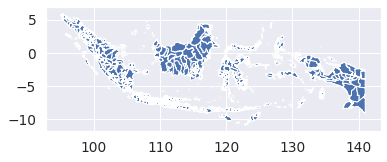

In [336]:
# check the plot
gdf2.plot()

### 4.3 Merging Dataset

To adequetly prepare for the data analysis, revenue expenditure dataset and city boundaries dataset has to be merged. City name will be the unique id to merge these dataset. In the city boundaries dataset, city names are stored in the column `name_2`. While, in the fiscal dataset city name are assign as rows index. Thus, it has to be stored in a column called `city`. City name in both dataset must be cleaned to standarise. 

In [362]:
# Change index as `city` column
data2_selected3 = data2_selected2.reset_index()
data2_selected3.rename(columns={"index": "city"}, inplace=True)

# Clean city name
data2_selected3["city"] = data2_selected3["city"].str.lower().replace(" ", "_")

data2_selected3

index,city,tax_revenue,retribution,regionally-owned_enterprise,intergovernmental_transfer,capital_expenditure
0,bangkalan,54.72,22.92,4.40,1734.28,2287.33
1,banyuwangi,224.77,72.95,24.38,2200.95,3216.20
2,batu,149.52,18.16,4.23,689.97,1087.36
3,blitar,90.99,39.39,2.18,1766.78,2314.92
4,bojonegoro,99.39,40.25,144.61,2894.85,6219.91
5,bondowoso,41.30,28.60,4.20,1614.27,2079.28
6,gresik,724.00,134.29,14.01,1710.22,3433.49
7,jember,223.42,42.20,6.10,2569.37,4448.91
8,jombang,120.00,15.34,3.43,1899.18,2766.85
9,kediri,210.02,26.34,8.92,2198.81,3168.89


In [365]:
# Clean city name
gdf2["name_2"] = gdf2["name_2"].str.lower().replace(" ", "_")
gdf2["name_2"] = gdf2["name_2"].str.replace(' ','_')

# Select only necessary column
gdf2_selected = gdf2[["name_2", "geometry"]]
gdf2_selected

gdf2_selected

,name_2,geometry
0,aceh_barat,"POLYGON ((96.06915 4.19539, 96.06725 4.19651, ..."
1,aceh_barat_daya,"MULTIPOLYGON (((96.94196 3.57464, 96.94110 3.5..."
2,aceh_besar,"MULTIPOLYGON (((95.78426 5.24092, 95.78445 5.2..."
3,aceh_jaya,"MULTIPOLYGON (((95.87673 4.36754, 95.87687 4.3..."
4,aceh_selatan,"MULTIPOLYGON (((97.74693 2.44002, 97.74638 2.4..."
...,...,...
497,bantul,"POLYGON ((110.32938 -8.00756, 110.32954 -8.008..."
498,gunung_kidul,"MULTIPOLYGON (((110.60487 -8.14750, 110.60499 ..."
499,kota_yogyakarta,"POLYGON ((110.39351 -7.82868, 110.39330 -7.828..."
500,kulon_progo,"POLYGON ((110.14531 -7.95117, 110.14469 -7.951..."


Once city names have been strandarise, both file can be merged.

In [366]:
merged = pd.merge(
    gdf2_selected, data2_selected3, left_on="name_2", right_on="city", how="inner"
)
# data3 = pd.merge(data2, gdf2, left_on='city', right_on='name_2', how='inner').reset_index()
merged

,name_2,geometry,city,tax_revenue,retribution,regionally-owned_enterprise,intergovernmental_transfer,capital_expenditure
0,bangkalan,"POLYGON ((113.04388 -7.20346, 113.04381 -7.203...",bangkalan,54.72,22.92,4.40,1734.28,2287.33
1,banyuwangi,"MULTIPOLYGON (((114.36061 -8.65745, 114.36009 ...",banyuwangi,224.77,72.95,24.38,2200.95,3216.20
2,batu,"POLYGON ((112.52912 -7.92540, 112.52888 -7.925...",batu,149.52,18.16,4.23,689.97,1087.36
3,blitar,"MULTIPOLYGON (((112.23884 -8.35246, 112.23882 ...",blitar,90.99,39.39,2.18,1766.78,2314.92
4,bojonegoro,"POLYGON ((111.79700 -7.46134, 111.79652 -7.461...",bojonegoro,99.39,40.25,144.61,2894.85,6219.91
5,bondowoso,"POLYGON ((113.86049 -8.02954, 113.85921 -8.028...",bondowoso,41.30,28.60,4.20,1614.27,2079.28
6,gresik,"MULTIPOLYGON (((112.62847 -7.29293, 112.62839 ...",gresik,724.00,134.29,14.01,1710.22,3433.49
7,jember,"MULTIPOLYGON (((113.66013 -8.50156, 113.66015 ...",jember,223.42,42.20,6.10,2569.37,4448.91
8,jombang,"POLYGON ((112.27322 -7.35732, 112.27361 -7.357...",jombang,120.00,15.34,3.43,1899.18,2766.85
9,kediri,"POLYGON ((111.97362 -8.01049, 111.97346 -8.010...",kediri,210.02,26.34,8.92,2198.81,3168.89


In [367]:
# Check distribution
merged.describe()

,tax_revenue,retribution,regionally-owned_enterprise,intergovernmental_transfer,capital_expenditure
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,279.276053,37.461053,16.861842,1609.365263,2668.610789
std,723.275947,54.563968,34.900194,586.698926,1650.858700
min,33.690000,7.750000,1.040000,580.060000,960.460000
25%,50.130000,15.662500,3.812500,1347.252500,1857.022500
50%,87.465000,24.630000,5.155000,1682.985000,2325.245000
75%,220.070000,37.522500,15.072500,1927.342500,2895.917500
max,4442.980000,332.030000,172.060000,2894.850000,9828.390000


Text(0.5, 1.0, 'Capital Expenditure')

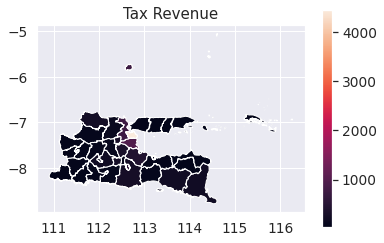

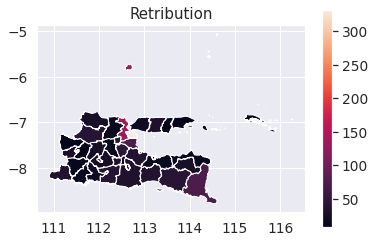

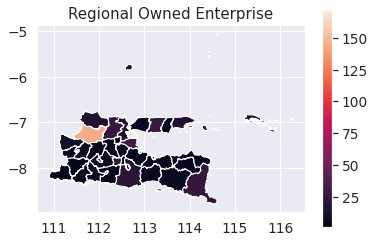

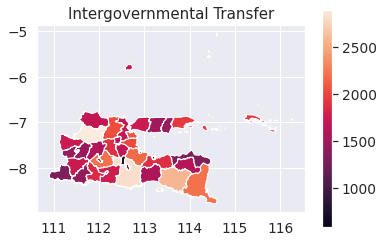

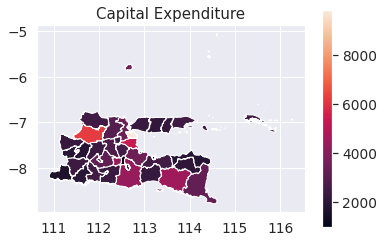

In [368]:
# Check into a map plot
merged.plot(column="tax_revenue", legend=True)
plt.title("Tax Revenue")
merged.plot(column="retribution", legend=True)
plt.title("Retribution")
merged.plot(column="regionally-owned_enterprise", legend=True)
plt.title("Regional Owned Enterprise")
merged.plot(column="intergovernmental_transfer", legend=True)
plt.title("Intergovernmental Transfer")
merged.plot(column="capital_expenditure", legend=True)
plt.title("Capital Expenditure")

## 5.0 Result and Discussion

### 5.1 Check Distribution

To understand each variable of revenue and expenditure, we will plot the data distribution on bar plot and correlation of all variables in scatter plot using `sns` package. 

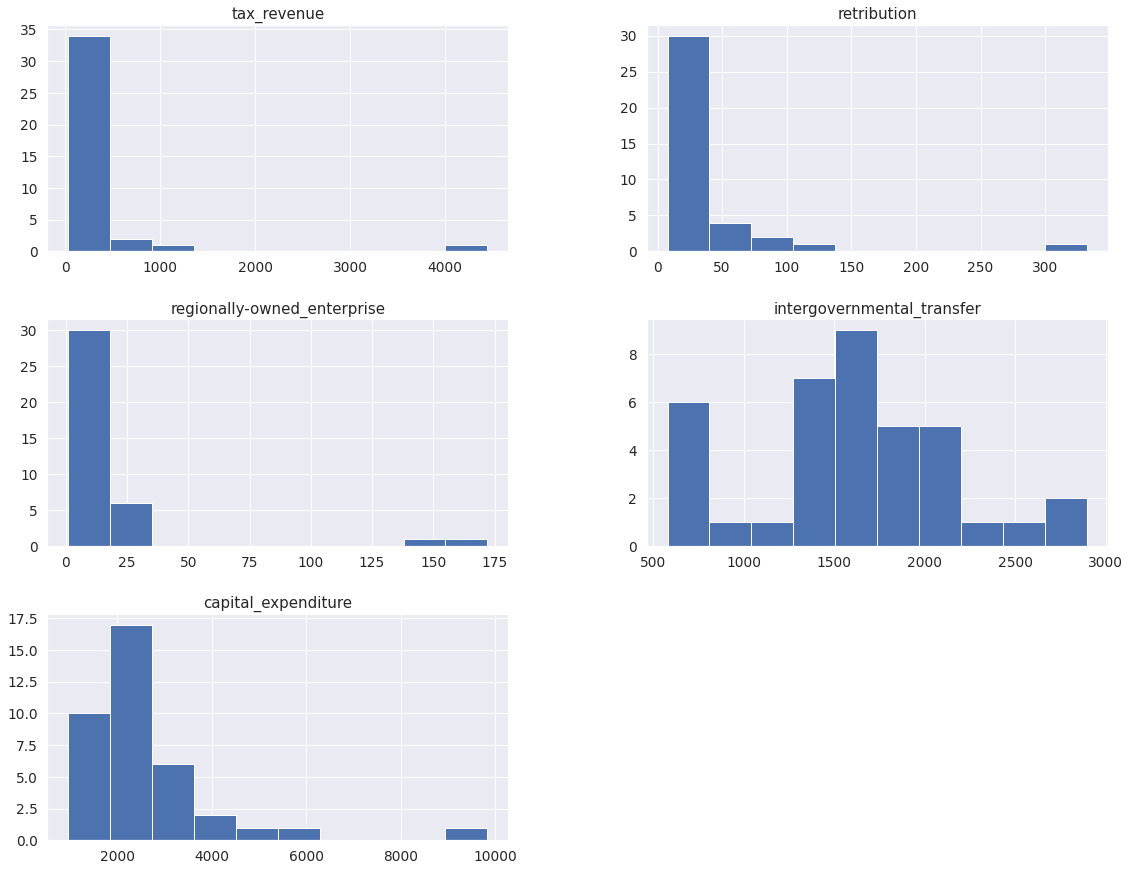

In [369]:
# Make non spatial dataset to check the distribution
rre_check = merged[
    [
        "tax_revenue",
        "retribution",
        "regionally-owned_enterprise",
        "intergovernmental_transfer",
        "capital_expenditure",
    ]
]

# Check using the value distribution
rre_check_hist = rre_check.hist(figsize=(19, 15))
plt.rc("font", size=9)

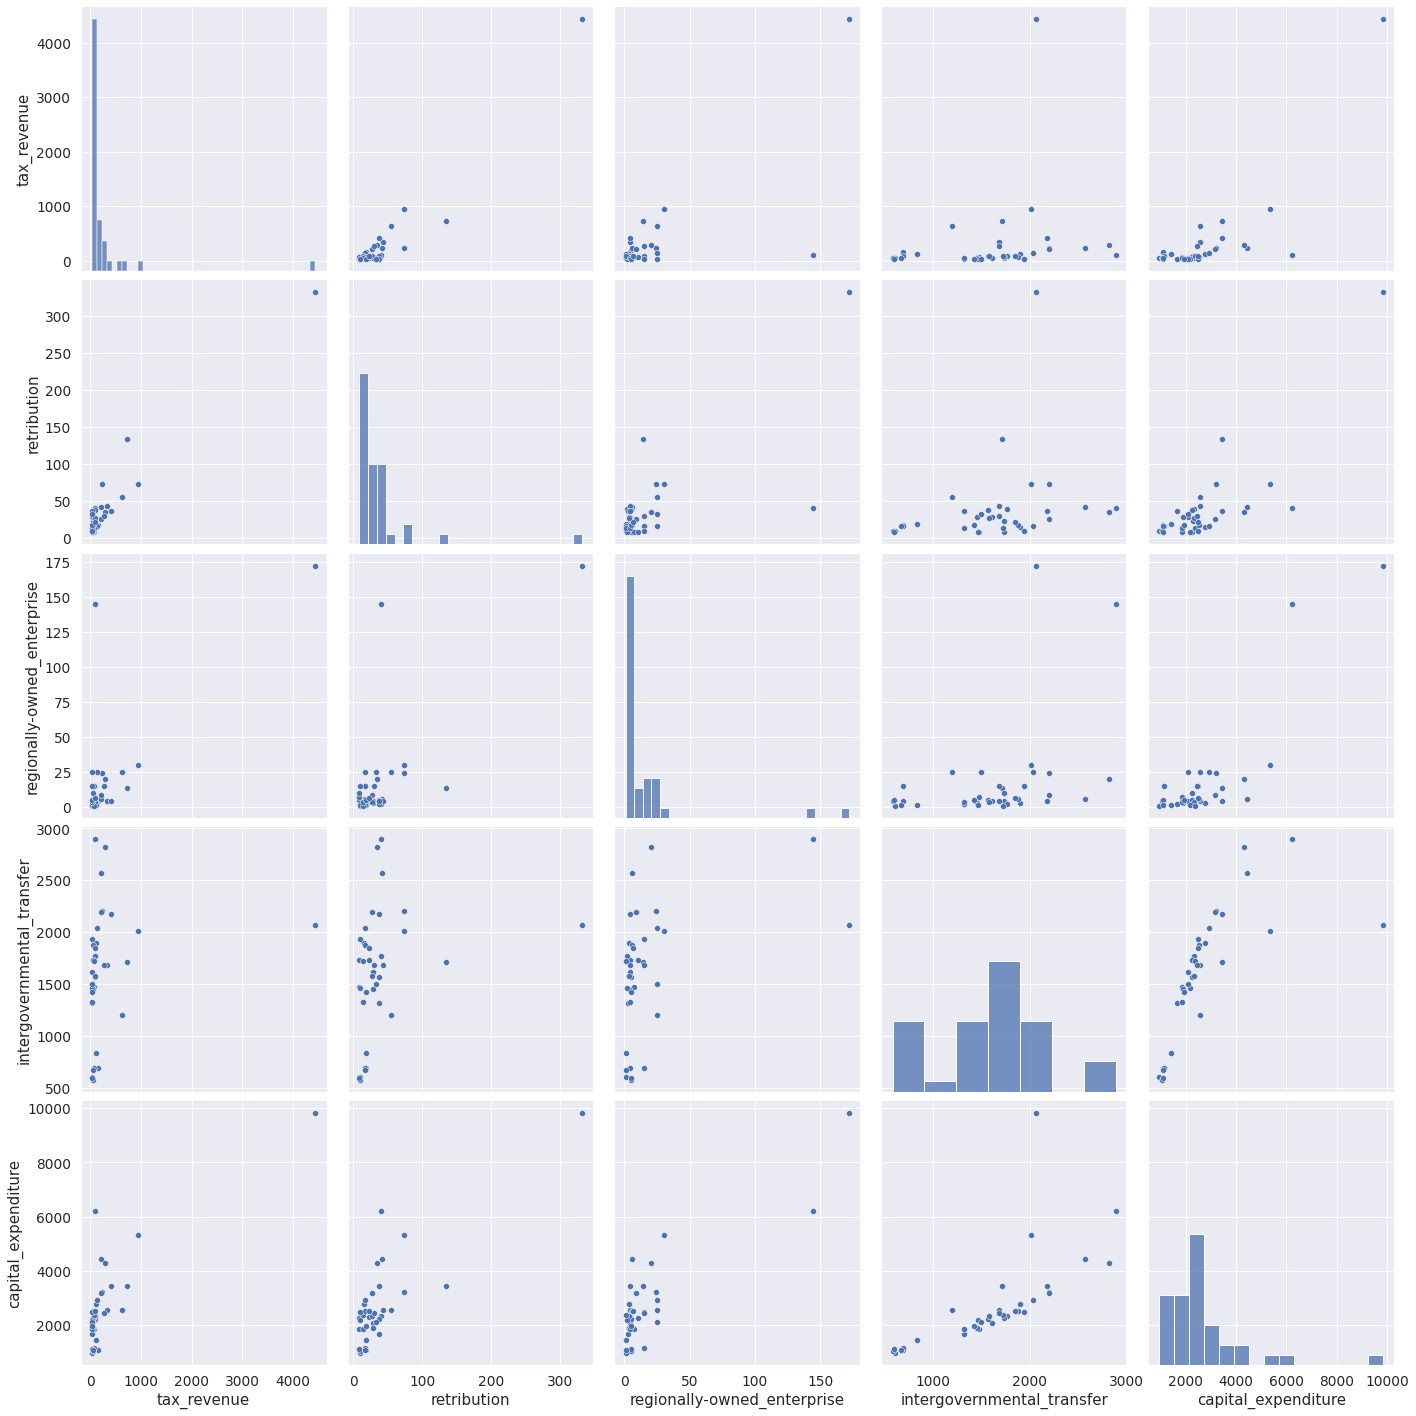

In [370]:
# make new dataset just to check (rre = regional revenue expenditure)
rre_check = merged[
    [
        "tax_revenue",
        "retribution",
        "regionally-owned_enterprise",
        "intergovernmental_transfer",
        "capital_expenditure",
    ]
]

# Plot distribution and scatterplot
rre_plot_sns = sns.pairplot(rre_check, height=4)
sns.set(font_scale=1.25)
plt.show()

The result shows that 4 of our variables — tax revenue, retribution, regional-owned enterprise, and capital expenditure — are skewed left which means they have high frequency of low value. Moreover, both scatter plots and bar plots show that there are one or two outliers on every variable. Huge gap on the chart indicates the regional disparities.

Plotting all the values together using `plot` package will help us understand the value better. It will help identifying which city that grow higher than the other.


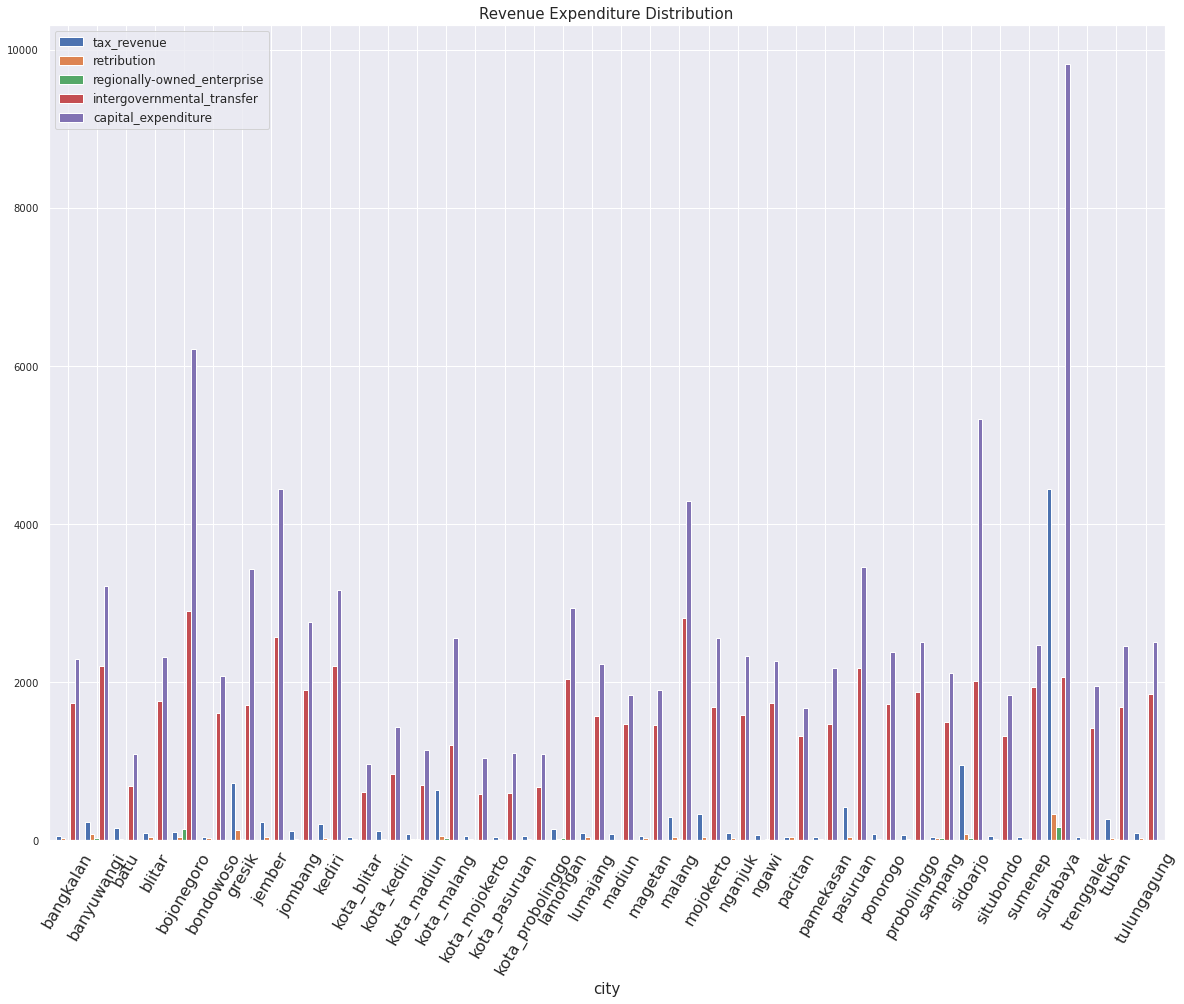

In [372]:
ax = merged.plot(
    x="city",
    y=[
        "tax_revenue",
        "retribution",
        "regionally-owned_enterprise",
        "intergovernmental_transfer",
        "capital_expenditure",
    ],
    kind="bar",
    rot=0,
    # stacked=True,
    figsize=(20, 15),
    width=0.8,
    fontsize=10,
    title="Revenue Expenditure Distribution",
)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=16)
_ = ax.legend(loc="upper left", fontsize=12)

Intergovernmental transfer is less disperse than other variables. However, there are 3 regions, Malang and Bojonegoro that have greatest value. High value outliers of tax and retribution is shown in Surabaya, as it is capital city of Surabaya. Regional governments are responsible on entertainment and hospitality taxes (Aritenang and Chandramidi, 2022). Capital expenditure is quite disperse with high value on Surabaya, Bojonegoro and Sidoarjo.

### 5.2 DBSCAN

#### Standarised The Data

From bar plot above, some variables range are exceed others. Although, all the variables are already in the same unit, standardisation is still needed because it makes clustering less dominated by greatest range. 

In [350]:
# extract necessary data first
raw = data2_selected2.copy()
raw.head()

index,tax_revenue,retribution,regionally-owned_enterprise,intergovernmental_transfer,capital_expenditure
Bangkalan,54.72,22.92,4.40,1734.28,2287.33
Banyuwangi,224.77,72.95,24.38,2200.95,3216.20
Batu,149.52,18.16,4.23,689.97,1087.36
Blitar,90.99,39.39,2.18,1766.78,2314.92
Bojonegoro,99.39,40.25,144.61,2894.85,6219.91


`MinMaxScaler()` function is favourable to standardise this data that highly skewed. The data will be adjusted within range 0 to 1.

In [351]:
mms = MinMaxScaler()

rre = raw.copy()
for c in raw.columns.values:
    rre[c] = mms.fit_transform(raw[c].values.reshape(-1, 1))
    print("The range of {} is [{}, {}]".format(c, rre[c].min(), rre[c].max()))
rre.head()

The range of tax_revenue is [0.0, 1.0]
The range of retribution is [0.0, 1.0]
The range of regionally-owned_enterprise is [0.0, 1.0]
The range of intergovernmental_transfer is [0.0, 0.9999999999999998]
The range of capital_expenditure is [0.0, 0.9999999999999999]


index,tax_revenue,retribution,regionally-owned_enterprise,intergovernmental_transfer,capital_expenditure
Bangkalan,0.004769,0.046781,0.019647,0.498628,0.149626
Banyuwangi,0.043336,0.201061,0.136475,0.700232,0.254371
Batu,0.026270,0.032102,0.018653,0.047482,0.014310
Blitar,0.012995,0.097570,0.006666,0.512669,0.152737
Bojonegoro,0.014900,0.100222,0.839492,1.000000,0.593087


In [360]:
merged.shape

(31, 8)

#### Make Function for Cluster Visualisation 

As this research aims to see spatial pattern, the cluster label will be visualise after run the clustering. `mapping_cluster` is a function for plotting the cluster label into a map. 

In [373]:
def mapping_clusters(labels_cluster):
    merged["cluster_nm"] = labels_cluster
    merged.plot(
        column="cluster_nm",
        categorical=True,
        legend=True,
        figsize=(12, 8),
        cmap="Paired",
    )
    plt.title("DBSCAN Cluster Distribution")

#### Check Epsilom

DBSCAN has ability to find clusters in dataset that contains noise and outliers such this dataset(Khan et al., 2014). Before running DBSCAN clustering, minimal number of points to exhibit cluster (minPts) and epsilon radius of cluster density (Mistry et al., 2021). Epsilon can be identify using elbow graph.

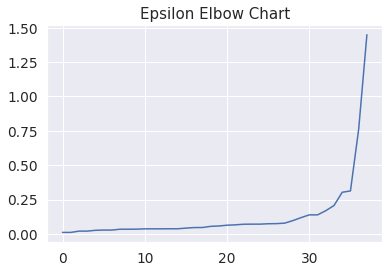

In [357]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(rre)
distances, indices = neighbors_fit.kneighbors(rre)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.title("Epsilon Elbow Chart")
plt.plot(distances)

The elbow showed at 0.15 which means that the suggested epsilon radius for nearby point to cluster. 

Min points should be larger than the number of data dimension. Previous study suggested to use twice number of the variable (Sander et al., 1998). However, the dataset has small observation number so it is decided to use `minPts = dimension+1` which is 6.

 0    22
-1     9
 1     7
dtype: int64

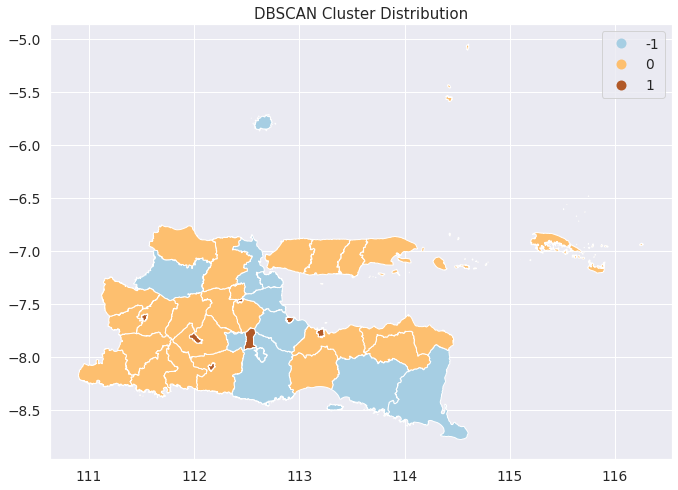

In [374]:
# run DBSCAN
minPts = 6  
epsilon = 0.15
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(rre)

# extract the cluster label into new object to be visualized
cluster_nm = dbsc.labels_

# visualise the cluster into maps
mapping_clusters(cluster_nm)

# Save cluster label and original dataset into 1 dataset
# rre_dbscan = rre.copy()
# rre_dbscan["dbscan_labels"] = dbsc.labels_

# show number of entries per cluster
pd.Series(dbsc.labels_).value_counts()

The DBSCAN clustering shows we have 2 clusters, assigned as 0 and 1 with member of 22 and 7 respectively. Meanwhile, 9 regions are identified as noise which means it does not belong to any cluster. It happen because these regions are considered as outlier due to huge distance. 

Cluster 0 shows agglomaration in Madura island (upper north), east south, and west are. However, every cluster 1 is surrounded by cluster 0 which indicates that geographic spill-over is not happening.

### 5.4 K-means

Because DBSCAN identified high number of noise, the next step will try to use K-means which is less robust to outliers. Thus to tackle outliers sensitivity problem,  Surabaya city which is identified as outliers will be taken out from the dataset before run K-means clustering. 

#### Drop Outliers

In [375]:
# drop `surabaya` from fiscal dataset
rre2 = rre.drop(["Surabaya"])
rre2

index,tax_revenue,retribution,regionally-owned_enterprise,intergovernmental_transfer,capital_expenditure
Bangkalan,0.004769,0.046781,0.019647,0.498628,0.149626
Banyuwangi,0.043336,0.201061,0.136475,0.700232,0.254371
Batu,0.026270,0.032102,0.018653,0.047482,0.014310
Blitar,0.012995,0.097570,0.006666,0.512669,0.152737
Bojonegoro,0.014900,0.100222,0.839492,1.000000,0.593087
Bondowoso,0.001726,0.064296,0.018477,0.446784,0.126165
Gresik,0.156558,0.390218,0.075839,0.488234,0.278873
Jember,0.043030,0.106235,0.029587,0.859391,0.393378
Jombang,0.019575,0.023406,0.013975,0.569866,0.203699
Kediri,0.039991,0.057327,0.046076,0.699307,0.249036


In [376]:
# drop `surabaya` which is in index `34` from geometry dataset
merged2 = merged.drop([34])
merged2

,name_2,geometry,city,tax_revenue,retribution,regionally-owned_enterprise,intergovernmental_transfer,capital_expenditure,cluster_nm
0,bangkalan,"POLYGON ((113.04388 -7.20346, 113.04381 -7.203...",bangkalan,54.72,22.92,4.40,1734.28,2287.33,0
1,banyuwangi,"MULTIPOLYGON (((114.36061 -8.65745, 114.36009 ...",banyuwangi,224.77,72.95,24.38,2200.95,3216.20,-1
2,batu,"POLYGON ((112.52912 -7.92540, 112.52888 -7.925...",batu,149.52,18.16,4.23,689.97,1087.36,1
3,blitar,"MULTIPOLYGON (((112.23884 -8.35246, 112.23882 ...",blitar,90.99,39.39,2.18,1766.78,2314.92,0
4,bojonegoro,"POLYGON ((111.79700 -7.46134, 111.79652 -7.461...",bojonegoro,99.39,40.25,144.61,2894.85,6219.91,-1
5,bondowoso,"POLYGON ((113.86049 -8.02954, 113.85921 -8.028...",bondowoso,41.30,28.60,4.20,1614.27,2079.28,0
6,gresik,"MULTIPOLYGON (((112.62847 -7.29293, 112.62839 ...",gresik,724.00,134.29,14.01,1710.22,3433.49,-1
7,jember,"MULTIPOLYGON (((113.66013 -8.50156, 113.66015 ...",jember,223.42,42.20,6.10,2569.37,4448.91,-1
8,jombang,"POLYGON ((112.27322 -7.35732, 112.27361 -7.357...",jombang,120.00,15.34,3.43,1899.18,2766.85,0
9,kediri,"POLYGON ((111.97362 -8.01049, 111.97346 -8.010...",kediri,210.02,26.34,8.92,2198.81,3168.89,0


#### Make Visualisation Function

In [377]:
def mapping_clusters2(labels_cluster):
    merged2["cluster_nm"] = labels_cluster
    merged2.plot(
        column="cluster_nm",
        categorical=True,
        legend=True,
        figsize=(12, 8),
        cmap="Paired",
    );

#### Find Number of Clustering

K-means clustering requires to identify number of cluster (k-value) beforehand. Typically, k-value identified from elbow plot with SSE (Sum of Squared Errors). SSE is performance indicator of clustering. Smaller SSE indicates better performance. The elbow shows balance value between small SSE and small k-value. 

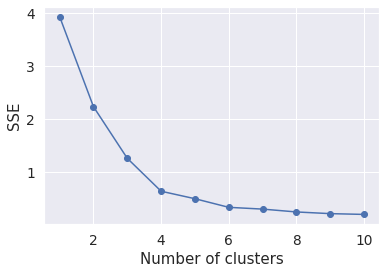

In [378]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k + 1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0
    )
    km.fit(rre2)
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Elbow plot suggest to have 3 number of cluster.

1    23
2     7
0     7
dtype: int64

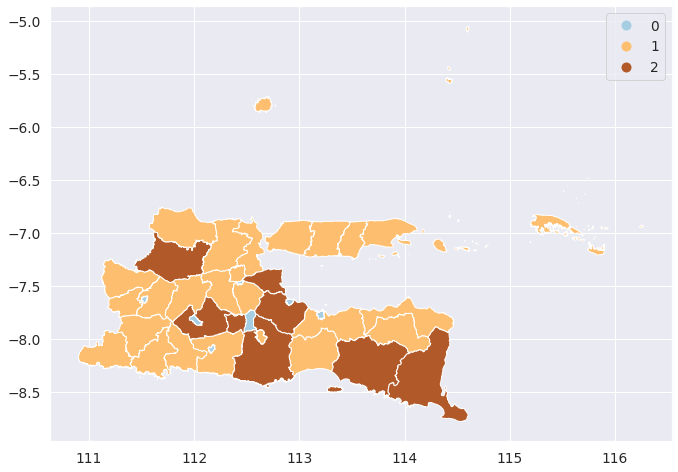

In [379]:
k_cluster = 3
random_seed = 100
kmeans_method = KMeans(n_clusters=k_cluster, random_state=random_seed)
kmeans_method.fit(rre2)

# plotting
mapping_clusters2(kmeans_method.labels_)

#  Save cluster label and original dataset into 1 dataset
# rre_kmeans = rre2.copy()
# rre_kmeans["kmeans_labels"] = kmeans_method.labels_

pd.Series(kmeans_method.labels_).value_counts()

K-means clustering result shows that cluster 1 has biggest member with 23 regions, meanwhile cluster 0 and 2 are similarly has 7 members. Although members of cluster 1 are adjacent to each other, we cannot say it indicates spill-over effects because members of cluster 0 and 2 are geographically spread. 

#### Compare Performance of K-means and DBSCAN

In [380]:
# Count the SSE value of DBSCAN
metrics.silhouette_score(rre, dbsc.labels_)

0.4740763079868348

In [381]:
# Count the SSE value of K-means
metrics.silhouette_score(rre2, kmeans_method.labels_)

0.522249189742353

|Clustering Methods|SSE |
|-----|----|
|DBSCAN|0.4740763079868348|
|K-means|0.5222491897423538|

DBSCAN has lower SSE value which means that it has better performance to cluster this dataset. Thus, for future research on fiscal decentralisation with numbers of outliers, it is suggested to use DBSCAN methods.

In [269]:
def f_cluster_visualise(p_labelled_df, p_vis_rows, p_log_columns, p_log=False):

    # Rules
    columns_to_log = p_log_columns
    log = p_log
    df_working_city = p_labelled_df.copy()

    # Visualise
    plots_total_number = df_working_city.shape[1]
    plots_per_row = p_vis_rows
    plots_per_column = math.ceil(plots_total_number / plots_per_row)

    plots_row_coordinates = list(np.arange(0, plots_per_row, 1)) * plots_per_column
    plots_row_coordinates = plots_row_coordinates[:plots_total_number]

    plots_column_coordinates = sorted(
        list(np.arange(0, plots_per_column, 1)) * plots_per_row
    )

    fig, axes = plt.subplots(plots_per_row, plots_per_column, figsize=(16, 6))

    for index, column in enumerate(list(df_working_city.columns)):

        ax_assign = axes[plots_row_coordinates[index]][plots_column_coordinates[index]]

        for value in list(df_working_city.kmeans_labels.unique()):

            if log is True:

                if column in columns_to_log:
                    # split dataframe into the number of clusters and visualise
                    df1 = df_working_city[df_working_city.kmeans_labels == value]
                    np.log(df1[column]).hist(
                        ax=ax_assign, alpha=0.3, label=f"Cluster {value}"
                    )
                    ax_assign.title.set_text(f"{column} (log)")
                    ax_assign.legend()

                else:
                    df1 = df_working_city[df_working_city.kmeans_labels == value]
                    df1[column].hist(ax=ax_assign, alpha=0.3, label=f"Cluster {value}")
                    ax_assign.title.set_text(column)
                    ax_assign.legend()
            else:
                df1 = df_working_city[df_working_city.kmeans_labels == value]
                df1[column].hist(ax=ax_assign, alpha=0.3, label=f"Cluster {value}")
                ax_assign.title.set_text(column)
                ax_assign.legend(loc="upper right")

    plt.tight_layout()

In [270]:
def f_cluster_summarise(p_labelled_df):

    summary_list = []

    for value in list(p_labelled_df.kmeans_labels.unique()):

        # split dataframe into the number of clusters to summarise
        df1 = p_labelled_df[p_labelled_df.kmeans_labels == value]
        df1_summary = df1.describe()

        summary_list.append(df1_summary)

    return summary_list

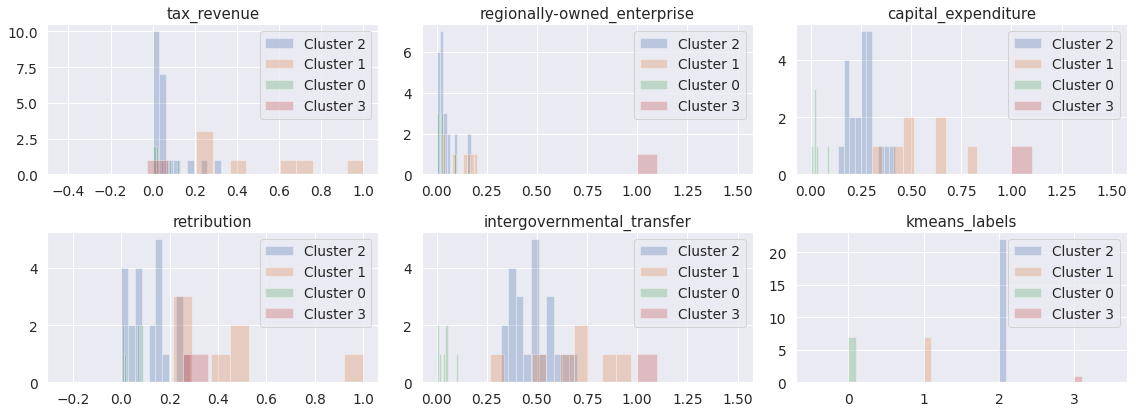

In [282]:
columns_to_log = ["index", "index"]
f_cluster_visualise(rre_kmeans, 2, columns_to_log, p_log=True)
# kmeans_summaries = f_cluster_summarise(rre_kmeans)

## 6. Conclusion

This research has examine fiscal decentralisation distribution and non-hierarchical clustering spatial distribution across East Java, Indonesia, in regional level. 

**Q1**: Distribution of regional revenue expenditure shows that east java is still suffer from regional disparities as every variable has outliers with shows huge gap. This finding supports previous study by Aritenang and Chandramidi (2022) that reveal disparities in Indonesia.

**Q2**: A group of regions with similar characteristic is agglomerated in several areas, while other groups’ members are spread across East Java.  

**Q3**: However in the middle of agglomerated areas there always other group members which indicates that spill-over does not affect fiscal decentralisation which argues previous research by Day and Lewis (2013) 

This research has studied East Java’s fiscal decentralisation in regional level. In the future, this research and code can be used to assess different administrative areas to have better understanding of fiscal decentralisation and geographic spill-over effect in Indonesia (Day and Lewis, 2013; Aritenang and Chandramidi, 2022). 

***
*word count: 1993*
***

## References

Arbia, G. (2006) *Spatial Econometrics: Statistical Foundations and Applications to Regional Convergence. Springer Science & Business Media.*

Aritenang, A.F. and Chandramidi, A.N. (2022) ‘The spatial effects of fiscal decentralization on regional convergence: the case of regions in indonesia’, *GeoJournal* [Preprint]. Available at: https://doi.org/10.1007/s10708-022-10724-2.

Booth, A. (2003) ‘Decentralisation and Poverty Alleviation in Indonesia’, *Environment and Planning C: Government and Policy*, 21(2), pp. 181–202. Available at: https://doi.org/10.1068/c0127.

Day, J. and Lewis, B. (2013) ‘Beyond univariate measurement of spatial autocorrelation: disaggregated spillover effects for Indonesia’, *Annals of GIS*, 19(3), pp. 169–185. Available at: https://doi.org/10.1080/19475683.2013.806353.

Faguet, J.-P. (2004) ‘Does decentralization increase government responsiveness to local needs?: Evidence from Bolivia’, *Journal of Public Economics*, 88(3), pp. 867–893. Available at: https://doi.org/10.1016/S0047-2727(02)00185-8.

Firman, T. (2009) ‘Decentralization Reform and Local-Government Proliferation in Indonesia: Towards a Fragmentation of Regional Development’, *Review of Urban & Regional Development Studies*, 21(2–3), pp. 143–157. Available at: https://doi.org/10.1111/j.1467-940X.2010.00165.x.

Khan, K. et al. (2014) ‘DBSCAN: Past, present and future’, *in The Fifth International Conference on the Applications of Digital Information and Web Technologies (ICADIWT 2014). The Fifth International Conference on the Applications of Digital Information and Web Technologies (ICADIWT 2014)*, pp. 232–238. Available at: https://doi.org/10.1109/ICADIWT.2014.6814687.

Lipshitz, G. (1992) ‘Divergence versus Convergence in Regional Development’, *Journal of Planning Literature*, 7(2), pp. 123–138. Available at: https://doi.org/10.1177/088541229200700201.

Liu, L.C. (2011) ‘THE TYPOLOGY OF FISCAL DECENTRALISATION SYSTEM: A CLUSTER ANALYSIS APPROACH: THE TYPOLOGY OF FISCAL DECENTRALISATION SYSTEM’, *Public Administration and Development*, 31(5), pp. 363–376. Available at: https://doi.org/10.1002/pad.605.

Mistry, V. et al. (2021) ‘AEDBSCAN—Adaptive Epsilon Density-Based Spatial Clustering of Applications with Noise’, in C.R. Panigrahi et al. (eds) *Progress in Advanced Computing and Intelligent Engineering*. Singapore: Springer Singapore (Advances in Intelligent Systems and Computing), pp. 213–226. Available at: https://doi.org/10.1007/978-981-15-6353-9_20.

Mohammed, S.M., Jacksi, K. and Zeebaree, S.R.M. (2020) ‘Glove Word Embedding and DBSCAN algorithms for Semantic Document Clustering’, in 2020 International Conference on Advanced Science and Engineering (ICOASE). *2020 International Conference on Advanced Science and Engineering (ICOASE)*, Duhok, Iraq: IEEE, pp. 1–6. Available at: https://doi.org/10.1109/ICOASE51841.2020.9436540.

Sander, J. et al. (1998) ‘Density-Based Clustering in Spatial Databases: The Algorithm GDBSCAN and Its Applications’, *Data Mining and Knowledge Discovery*, 2(2), pp. 169–194. Available at: https://doi.org/10.1023/A:1009745219419.

Setiawan, F. and Aritenang, A.F. (2019) ‘The impact of fiscal decentralization on economic performance in Indonesia’, *IOP Conference Series: Earth and Environmental Science*, 340(1), p. 012021. Available at: https://doi.org/10.1088/1755-1315/340/1/012021.

Vidyattama, Y. (2013) ‘Regional convergence and the role of the neighbourhood effect in decentralised Indonesia’, *Bulletin of Indonesian Economic Studies*, 49(2), pp. 193–211. Available at: https://doi.org/10.1080/00074918.2013.809841.

World Bank (2008) *Decentralization in Client Countries: An Evaluation of the World Bank Support: 1990-2007*. The World Bank. Available at: https://doi.org/10.1596/978-0-8213-7635-5.

****
- Original raw fiscal data can be found [here](https://djpk.kemenkeu.go.id/portal/data/apbd)
- Administration boundaries can be found here [here](https://gadm.org/download_country.html)